### Data Exploration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv('csv-files/data.csv')

In [17]:
data_corr = data.corr()

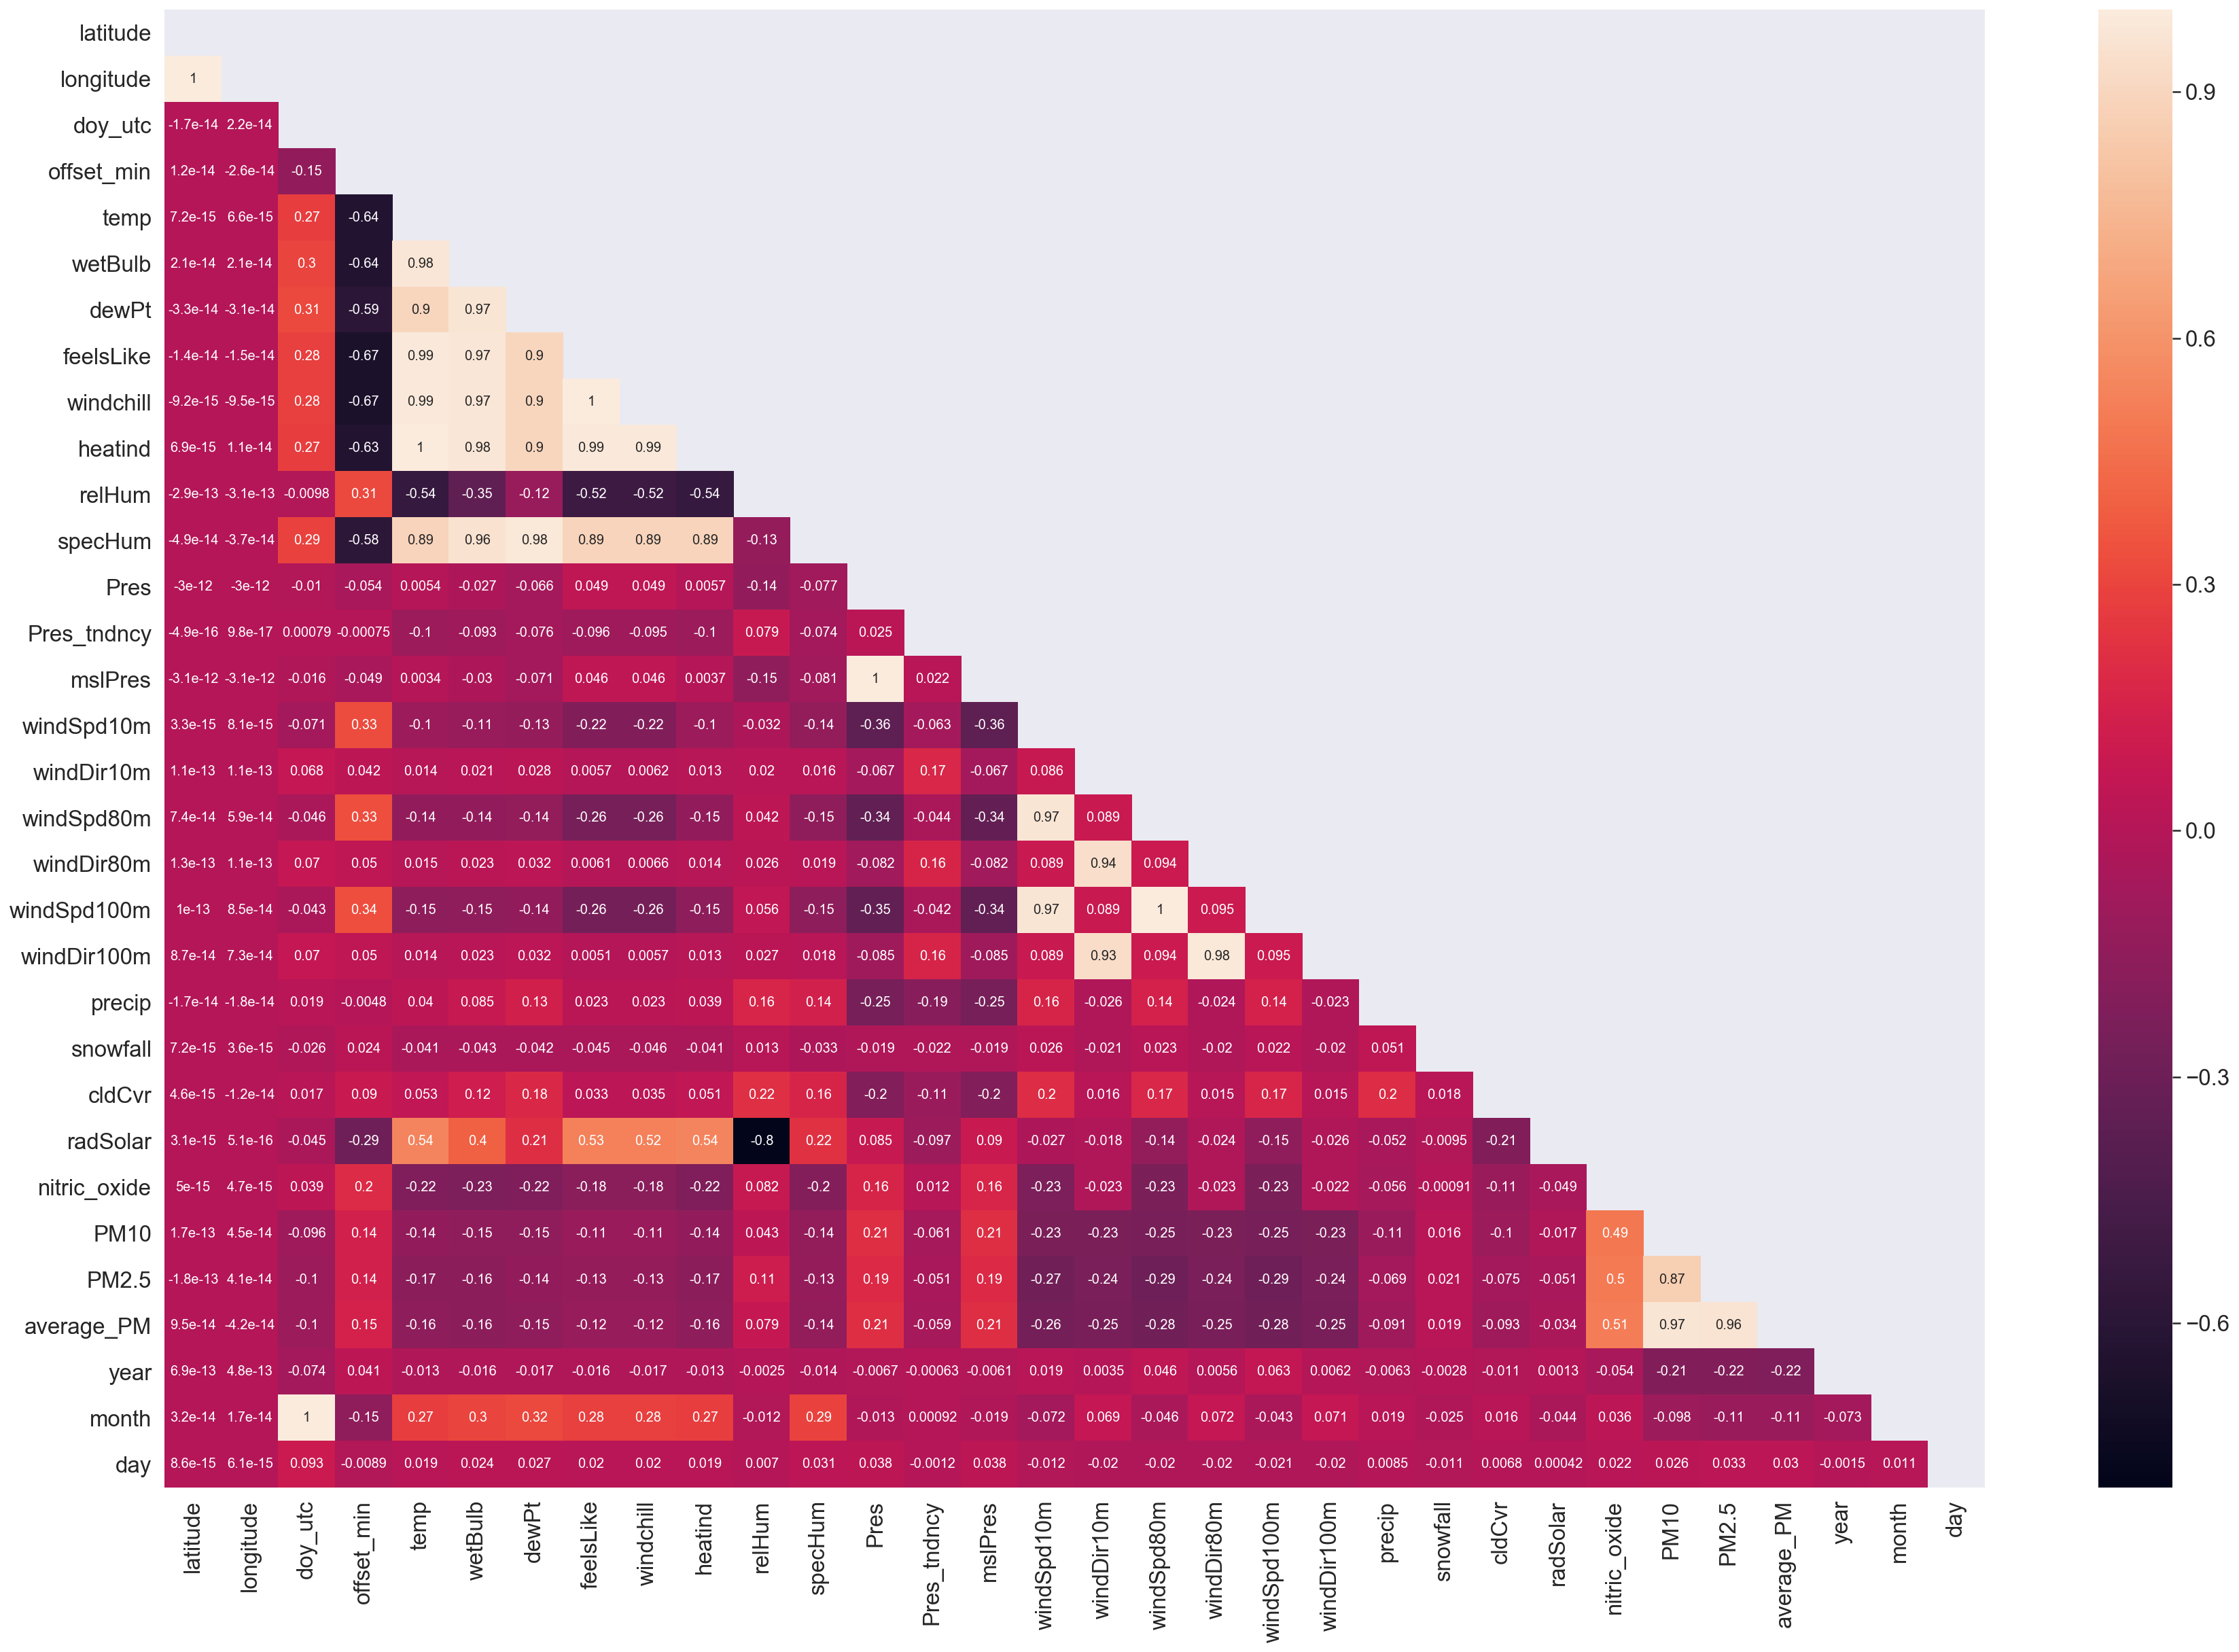

In [19]:
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True         # triu: TRIangle Upper

fig, ax = plt.subplots(figsize=(30, 20))

# Plot the heatmap with seaborn.
sns.heatmap(data_corr, mask=mask, ax=ax, annot=True)
ax.set_ylim([len(data_corr), 0])

plt.show()

•Strong correlations between Total solar radiation & Relative Humidity<BR>
•Little correlation between year and PM10 & PM2.5, but a very small corr between NO (nitric oxide) and year.<BR>
•Noticeable correlation between wind-attrib(ie. windspeed & direction) and concentrations (PM10,PM2.5) and less so on NO.  
•Nitric oxide correlates better with termperature and humidity conditions than Particulate Matter whereas Particulate matter correlates better on the wind speed aspects.   

In [89]:
#data.groupby('day_of_week')[['PM10']].mean()#maybe duplicate indicies
len(data.index.unique()),len(data) #no duplicate indicies.

(81805, 81805)

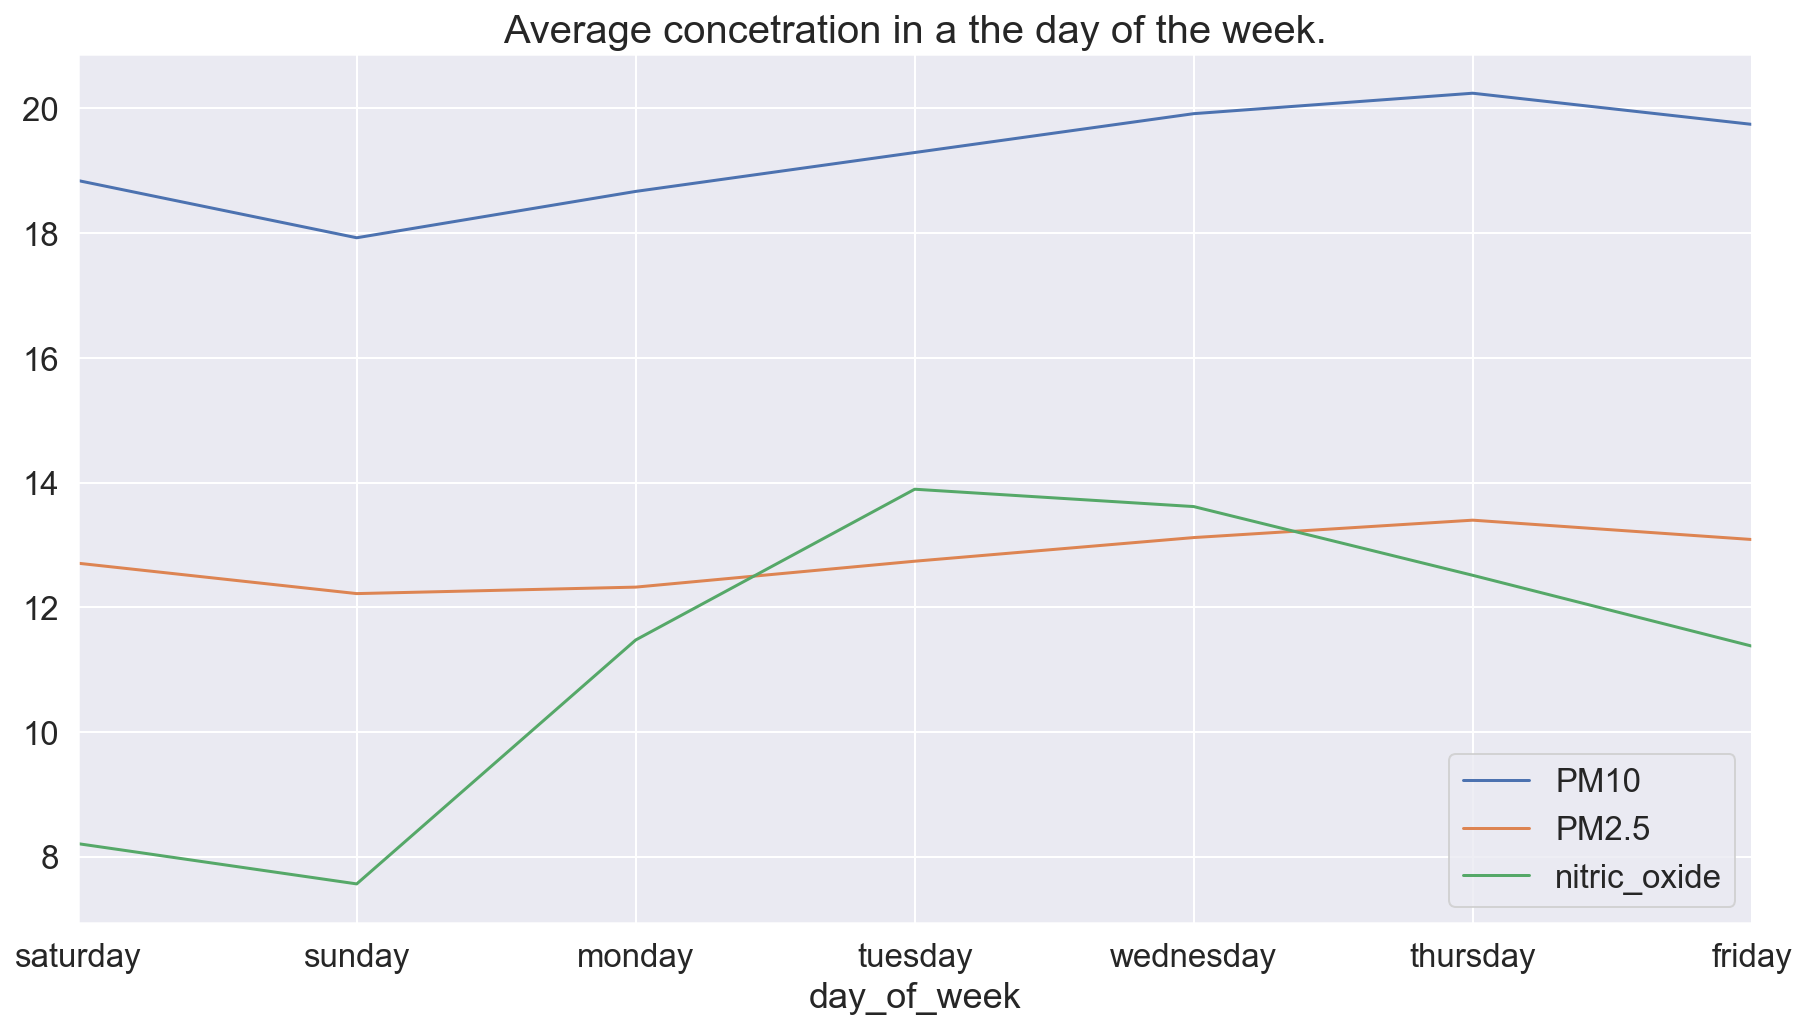

In [90]:
ax = data.groupby('day_of_week',sort=False)[['PM10']].mean().plot(figsize=(15,8))
data.groupby('day_of_week',sort=False)[['PM2.5']].mean().plot(ax=ax)
data.groupby('day_of_week',sort=False)[['nitric_oxide']].mean().plot(ax=ax)
plt.title('Average concetration in a the day of the week.',fontdict={'fontsize':20})
#plt.ylabel('Concentration/micrometrescubed')
plt.show()

Least on sundays, largest on thursdays closely followed by wednesdays. Majority of people stay in doors and sleep on sundays so less cars and also sunday is a week-end whereas thurdays and wedesdays are the most busiest workdays of the week. Perhaps more **Large goods vehicles* drive on these days**.

In [93]:
data.set_index('date_time',inplace=True)

In [479]:
from datetime import timedelta

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


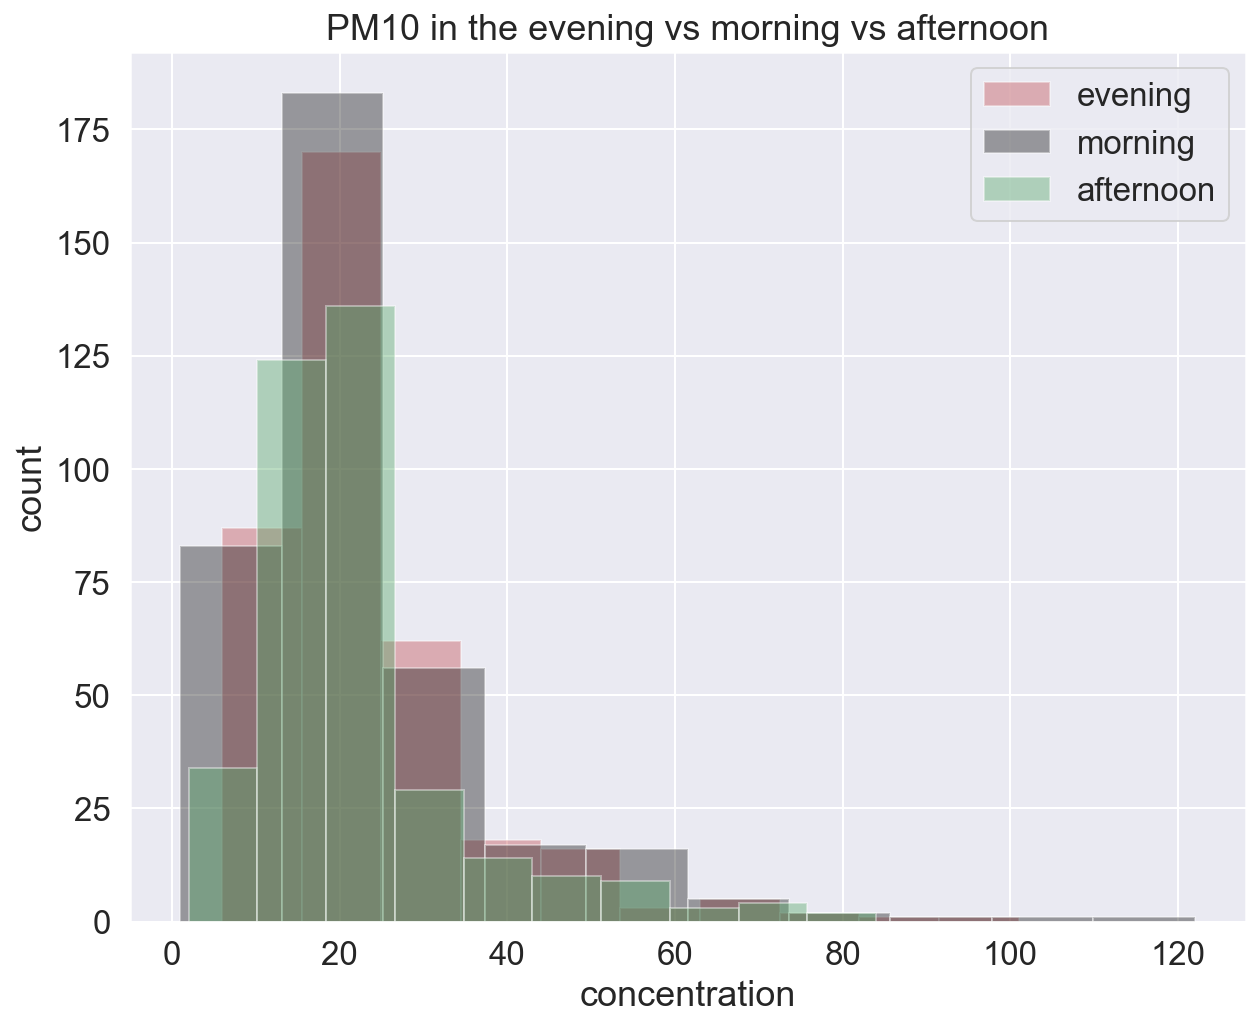

In [599]:
n_days = 365
data.hour_utc = pd.TimedeltaIndex(data.hour_utc)
ax = data[:24*n_days][data.hour_utc == '20:00:00'][['PM10']].hist(bins=10,color='r',alpha=.4,figsize=(10,8),label='evening')
data[:24*n_days][data.hour_utc == '06:00:00'][['PM10']].hist(bins=10,color='k',alpha=.4,ax=ax,label='morning')
data[:24*n_days][data.hour_utc == '13:00:00'][['PM10']].hist(bins=10,color='g',alpha=.4,ax=ax,label='afternoon')
plt.title('PM10 in the evening vs morning vs afternoon')
plt.ylabel('count')
plt.xlabel('concentration')
plt.legend()
plt.show()

Larger concentrations of PM are frequently more found as time progresses during the day, with least being in the early morning.

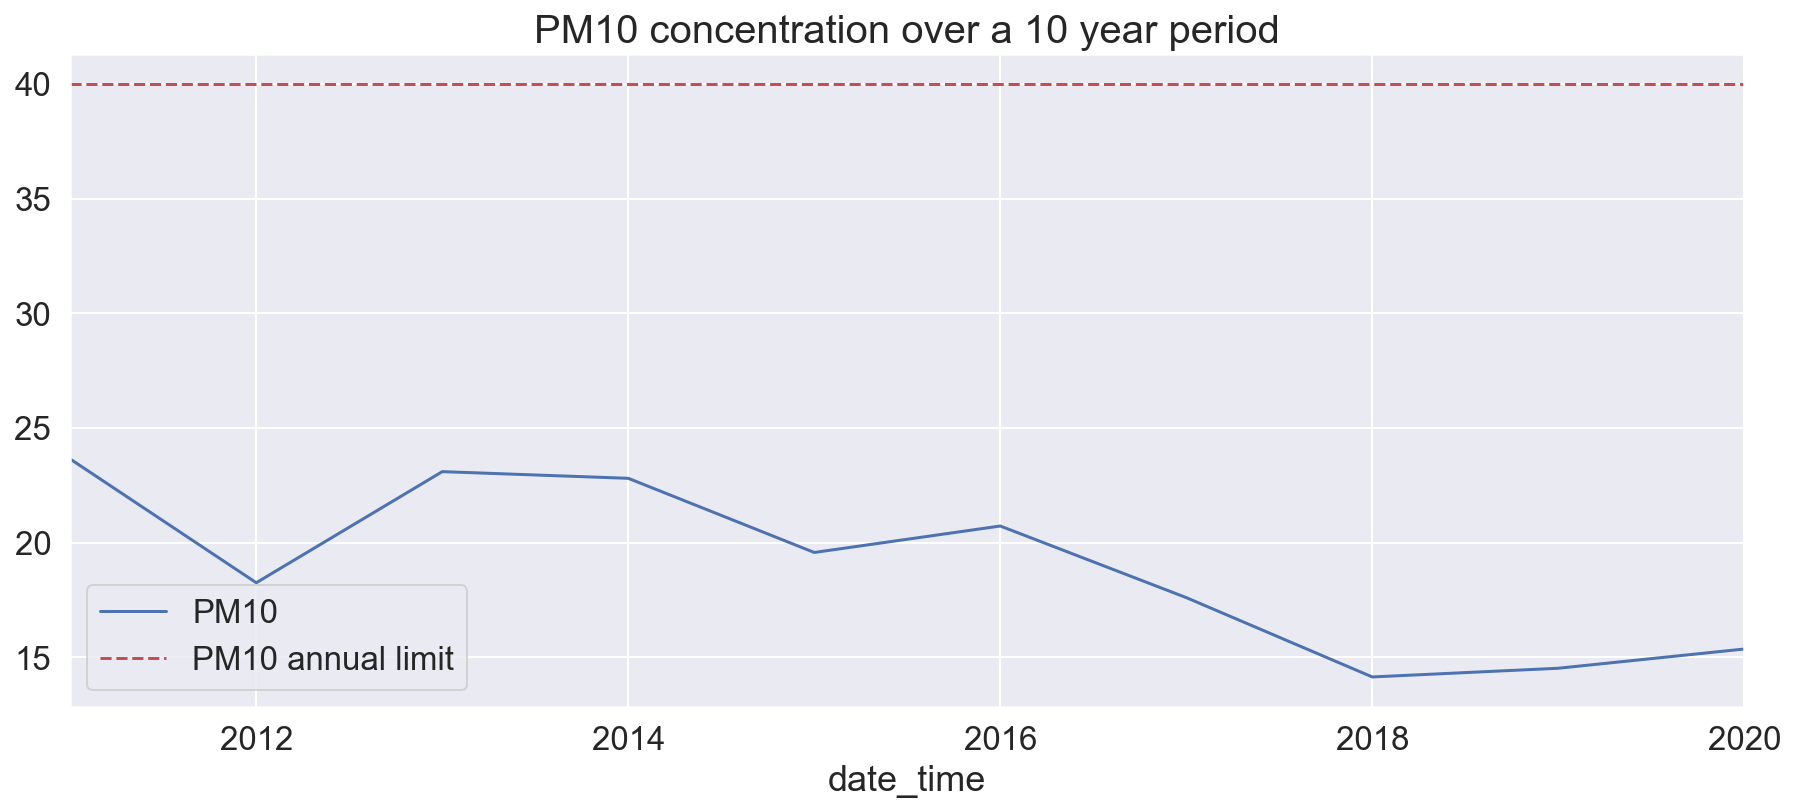

In [529]:
data[['PM10']].resample('Y').mean().plot(figsize=(15,6))
plt.title('PM10 yearly average',fontdict={'fontsize':20})
#plt.ylabel('concntr in microcentimetres cubed')
plt.axhline(y=40,color='r',ls='--',label='PM10 annual limit')
#plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
plt.legend()
plt.show()

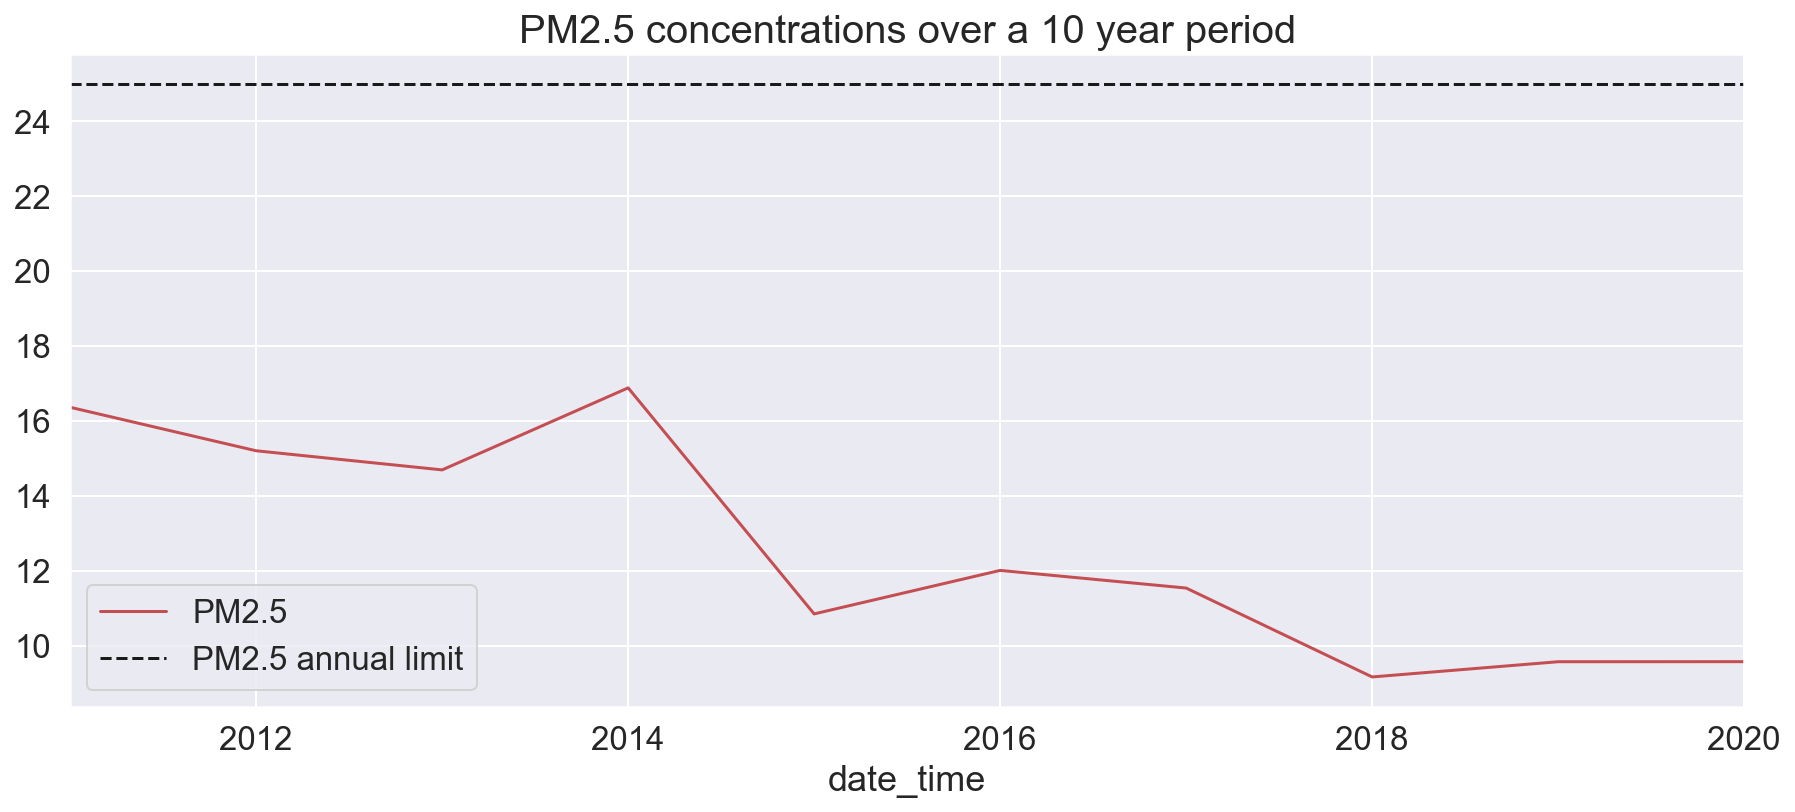

In [535]:
data[['PM2.5']].resample('Y').mean().plot(figsize=(15,6),color='r')
plt.title('PM2.5 concentrations over a 10 year period',fontdict={'fontsize':20})
#plt.ylabel('concntr in microcentimetres cubed')
plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
#plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
plt.legend()
plt.show()

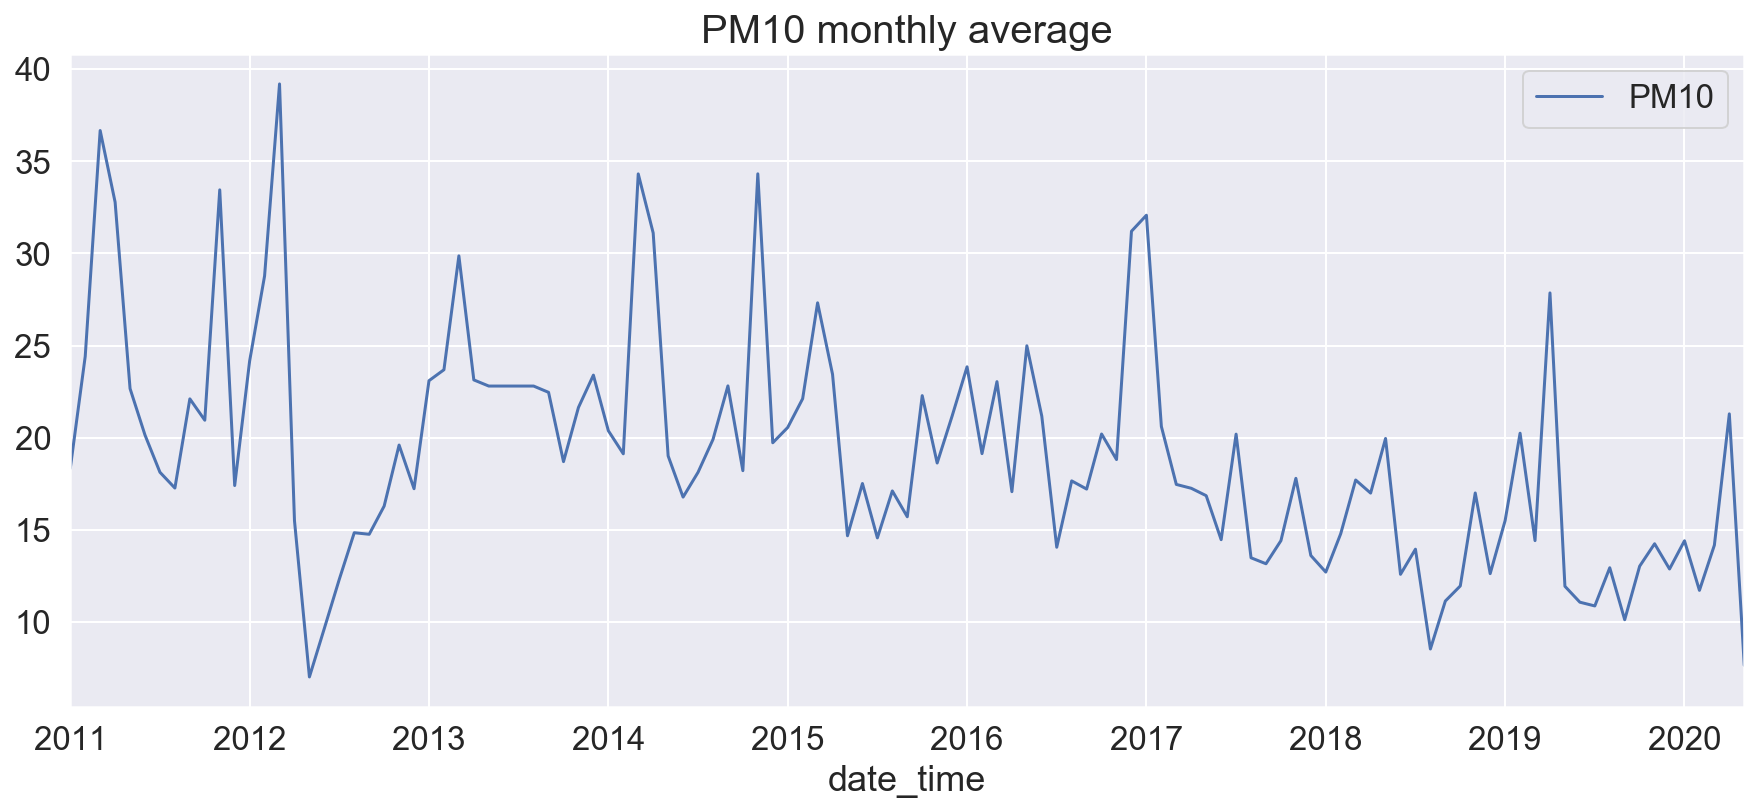

In [533]:
data[['PM10']].resample('M').mean().plot(figsize=(15,6))
plt.title('PM10 monthly average',fontdict={'fontsize':20})
#plt.ylabel('concntr in microcentimetres cubed')
#plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
plt.legend()
plt.show()

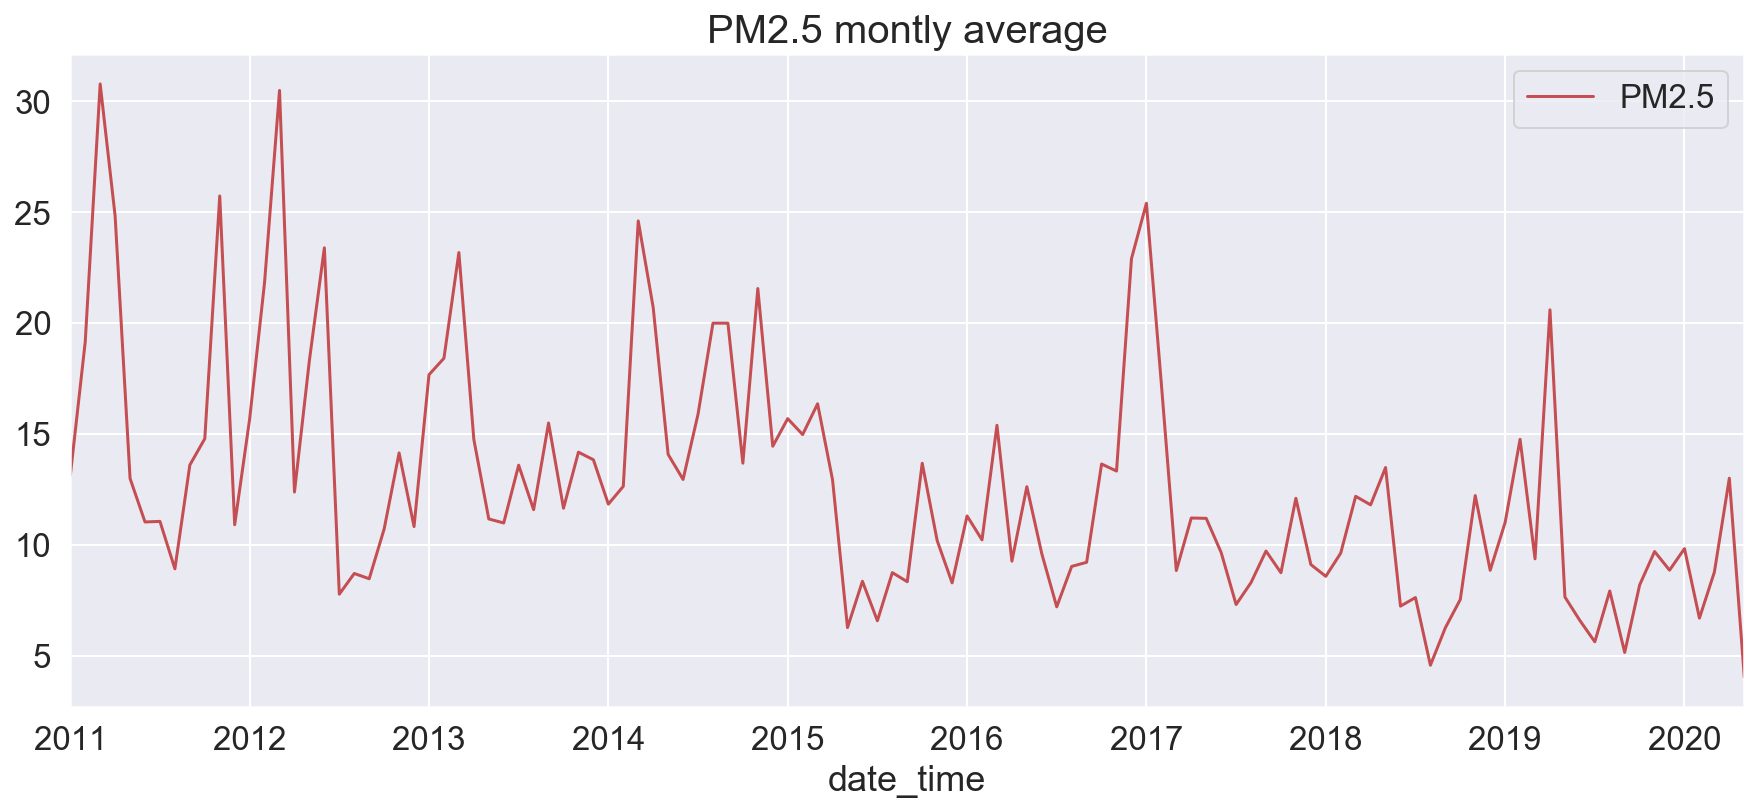

In [534]:
data[['PM2.5']].resample('M').mean().plot(figsize=(15,6),color='r')
plt.title('PM2.5 montly average',fontdict={'fontsize':20})
#plt.ylabel('concntr in microcentimetres cubed')
#plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
plt.legend()
plt.show()

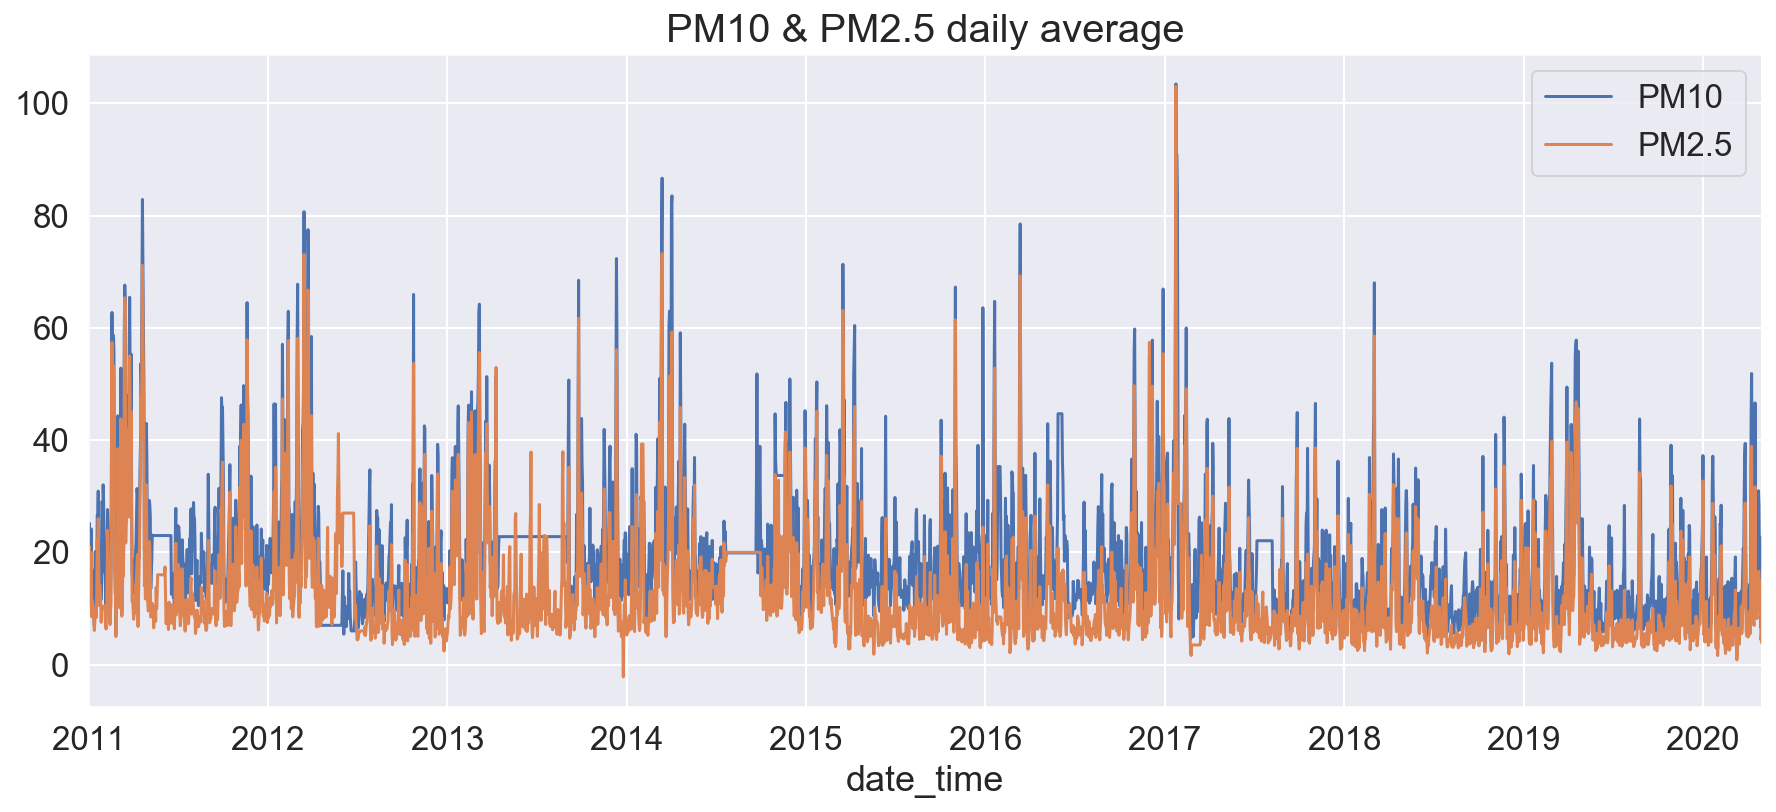

In [539]:
data[['PM10','PM2.5']].resample('d').mean().plot(figsize=(15,6))
plt.title('PM10 & PM2.5 daily average',fontdict={'fontsize':20})
#plt.ylabel('concntr in microcentimetres cubed')
#plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
plt.legend()
plt.show()

We can observe random fluctuations (noise) and an overall downward trend. This downward trend becomes much more noticeable from 2015- onwards.

In [25]:
data.set_index('date_time')[['PM10','PM2.5']].iloc[:24,:]

,PM10,PM2.5
date_time,,
2011-01-01 01:00:00,40.0,39.0
2011-01-01 02:00:00,36.0,30.0
2011-01-01 03:00:00,31.0,31.0
2011-01-01 04:00:00,31.0,29.0
2011-01-01 05:00:00,29.0,25.0
2011-01-01 06:00:00,25.0,23.0
2011-01-01 07:00:00,25.0,24.0
2011-01-01 08:00:00,28.0,22.0
2011-01-01 09:00:00,24.0,23.0


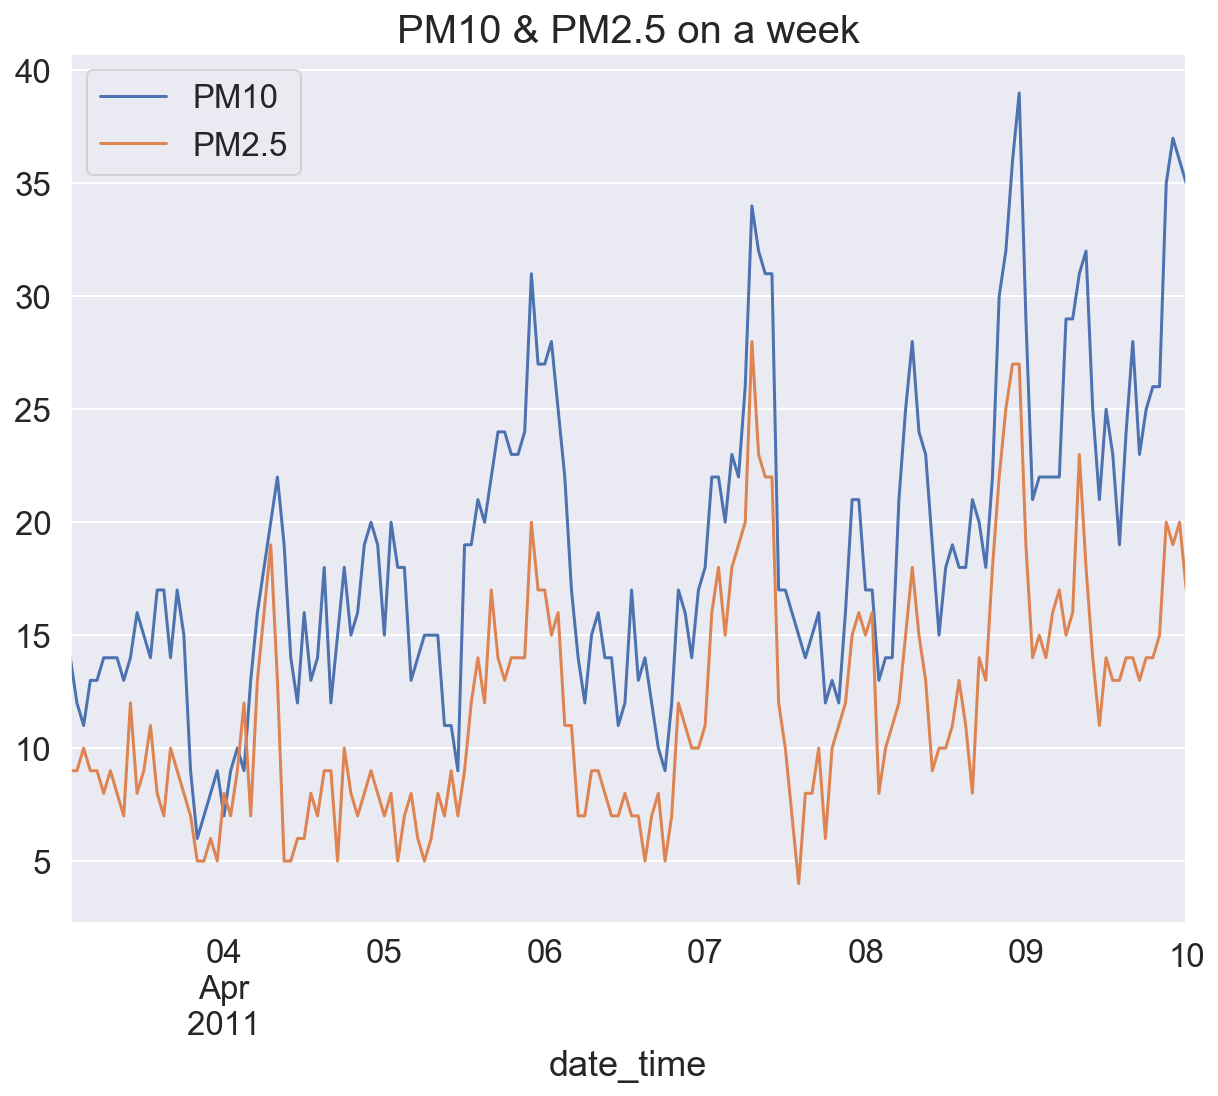

In [47]:
day_no = 1
week_no = 13
data.set_index('date_time')[['PM10','PM2.5']].iloc[24*(day_no+7*week_no):24*(day_no+7*(week_no+1)),:].plot(figsize=(10,8))
plt.title('PM10 & PM2.5 on a week',fontdict={'fontsize':20})
#plt.ylabel('concntr in microcentimetres cubed')
#plt.axhline(y=25,color='k',ls='--',label='PM2.5 annual limit')
plt.legend()
plt.show()

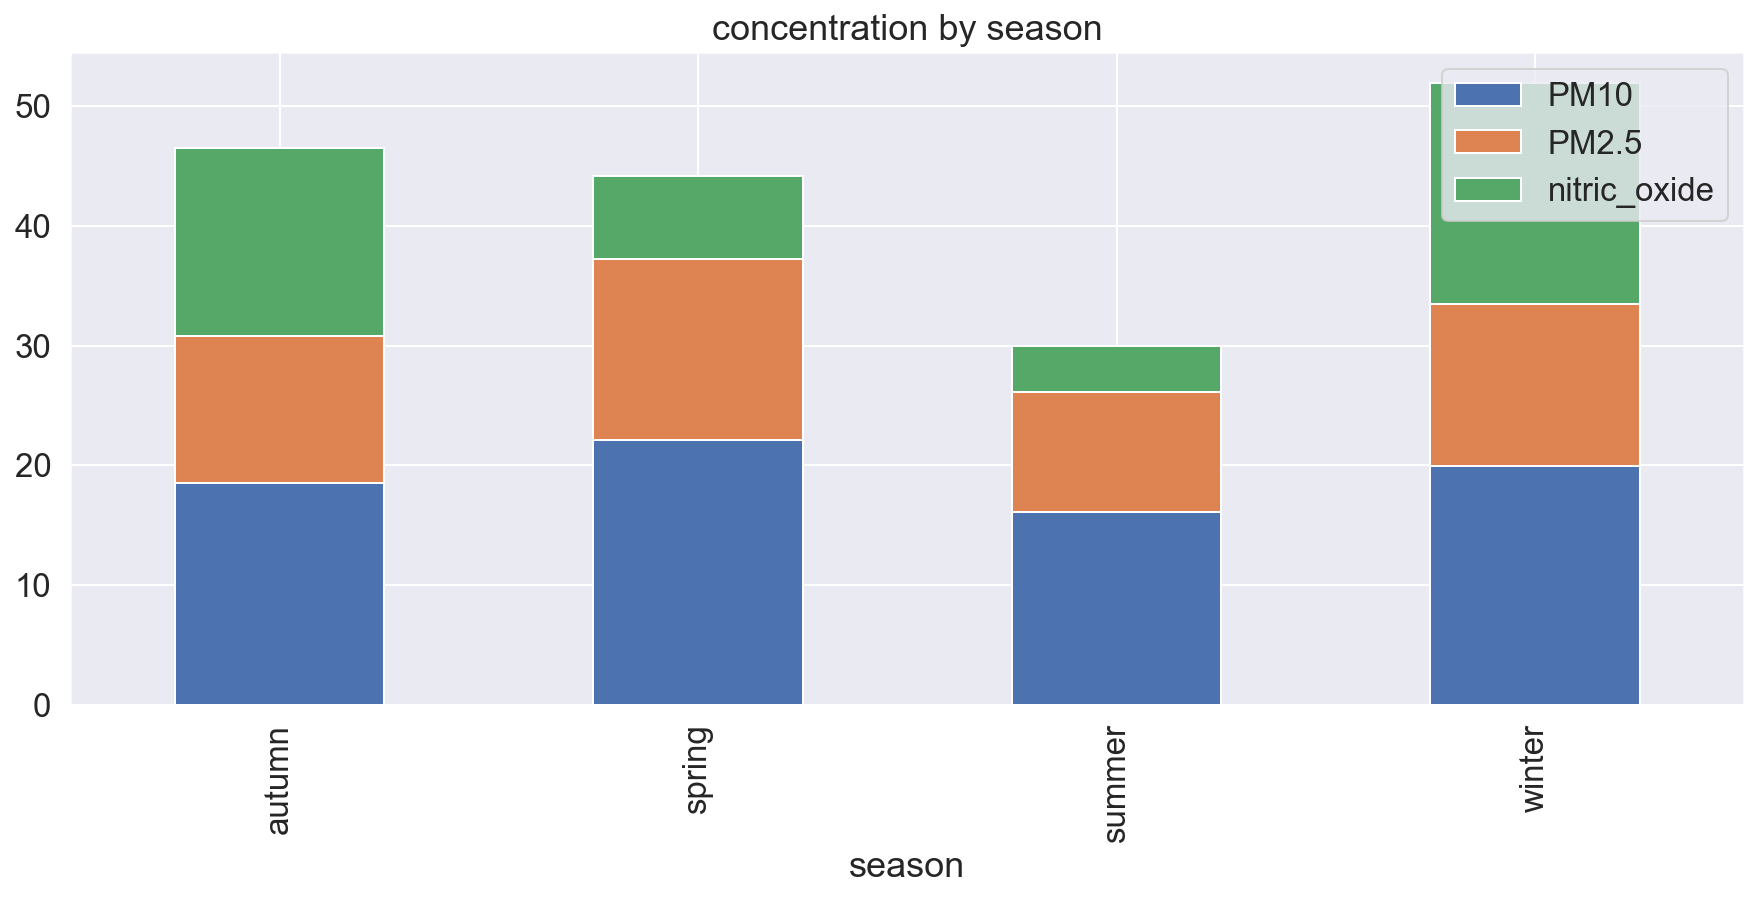

In [100]:
data.groupby('season')[['PM10','PM2.5','nitric_oxide']].mean().plot(kind='bar',figsize=(15,6),stacked=True)
plt.title('concentration by season')
#plt.ylabel('concntr in microcentimetres cubed')
plt.show()

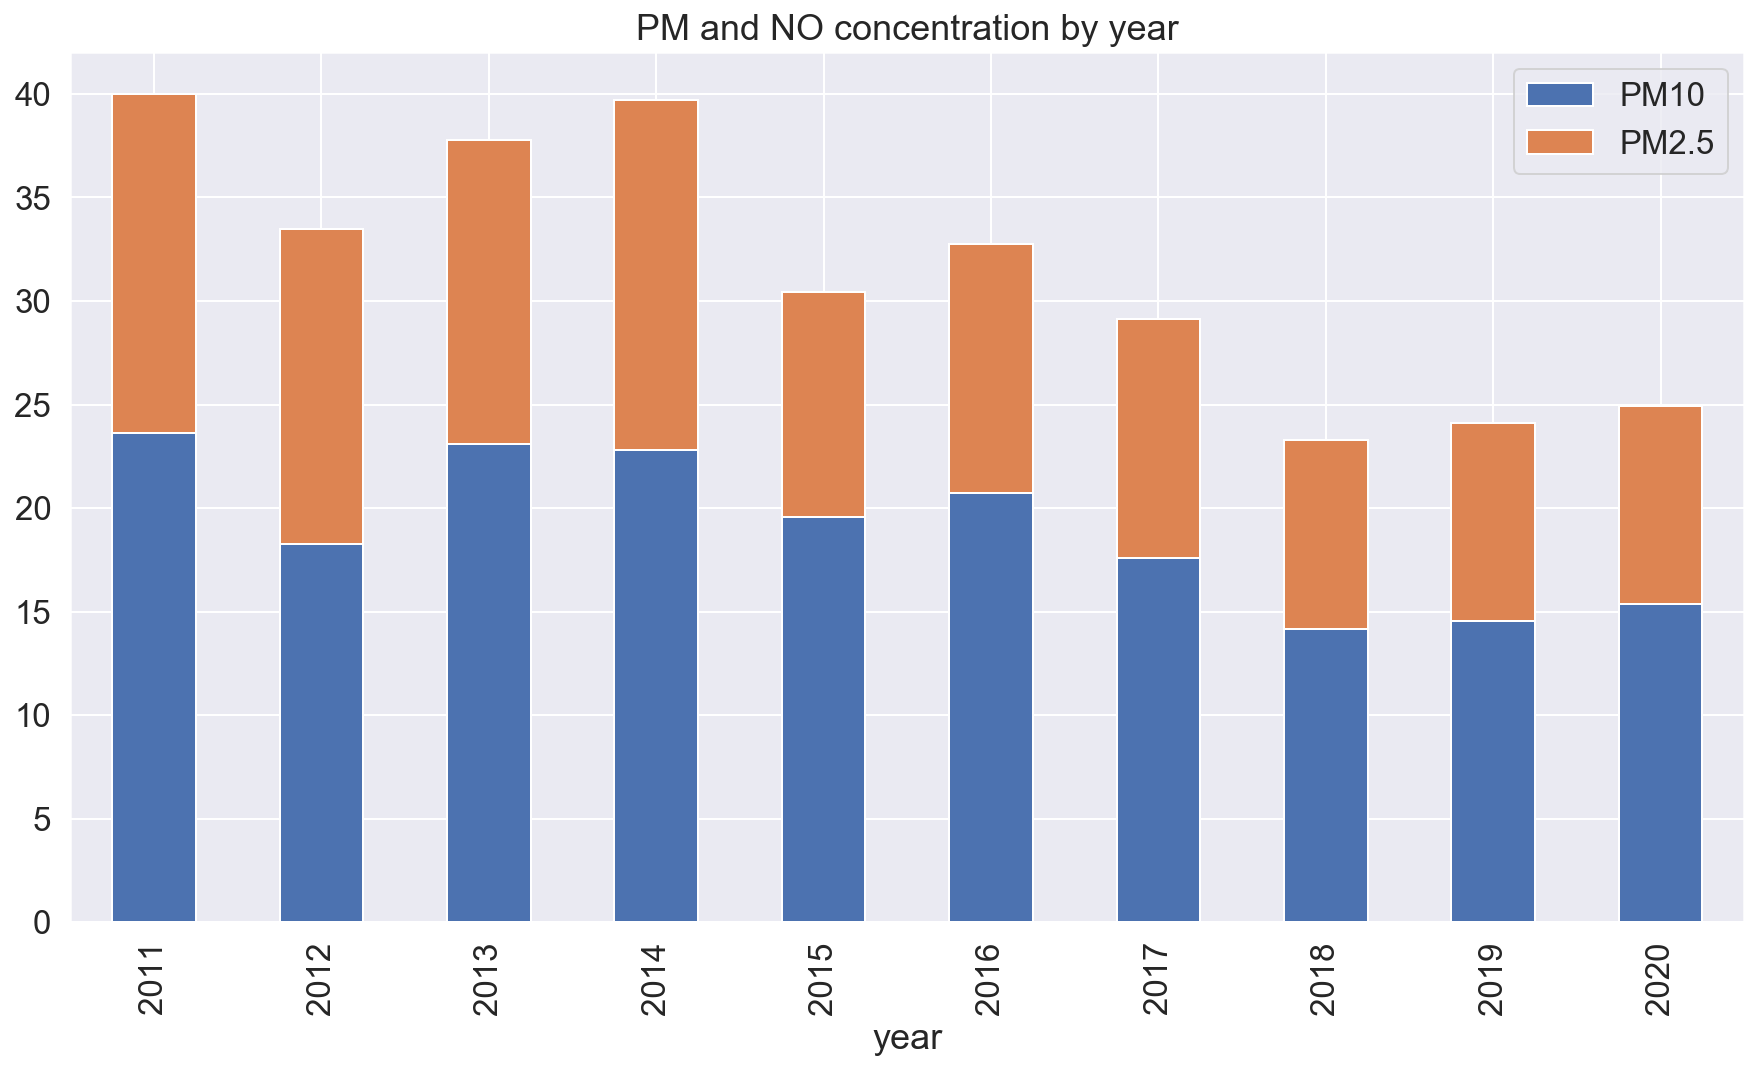

In [48]:
data.groupby('year')[['PM10','PM2.5']].mean().plot(kind='bar',stacked=True,figsize=(15,8))

plt.title('PM and NO concentration by year')
#plt.ylabel('concntr in microcentimetres cubed')
plt.show()

Graphs indicate a downward trend of the sum total of particulate matter in the air for later years.

In [1384]:
data.reset_index(inplace=True)

In [59]:
## standardise the data and let's get all variables into a plot
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_sub = data.set_index('date_time')[['windSpd10m','relHum','specHum','temp','average_PM']]

df_std = pd.DataFrame(scaler.fit_transform(data_sub),columns = data_sub.columns)

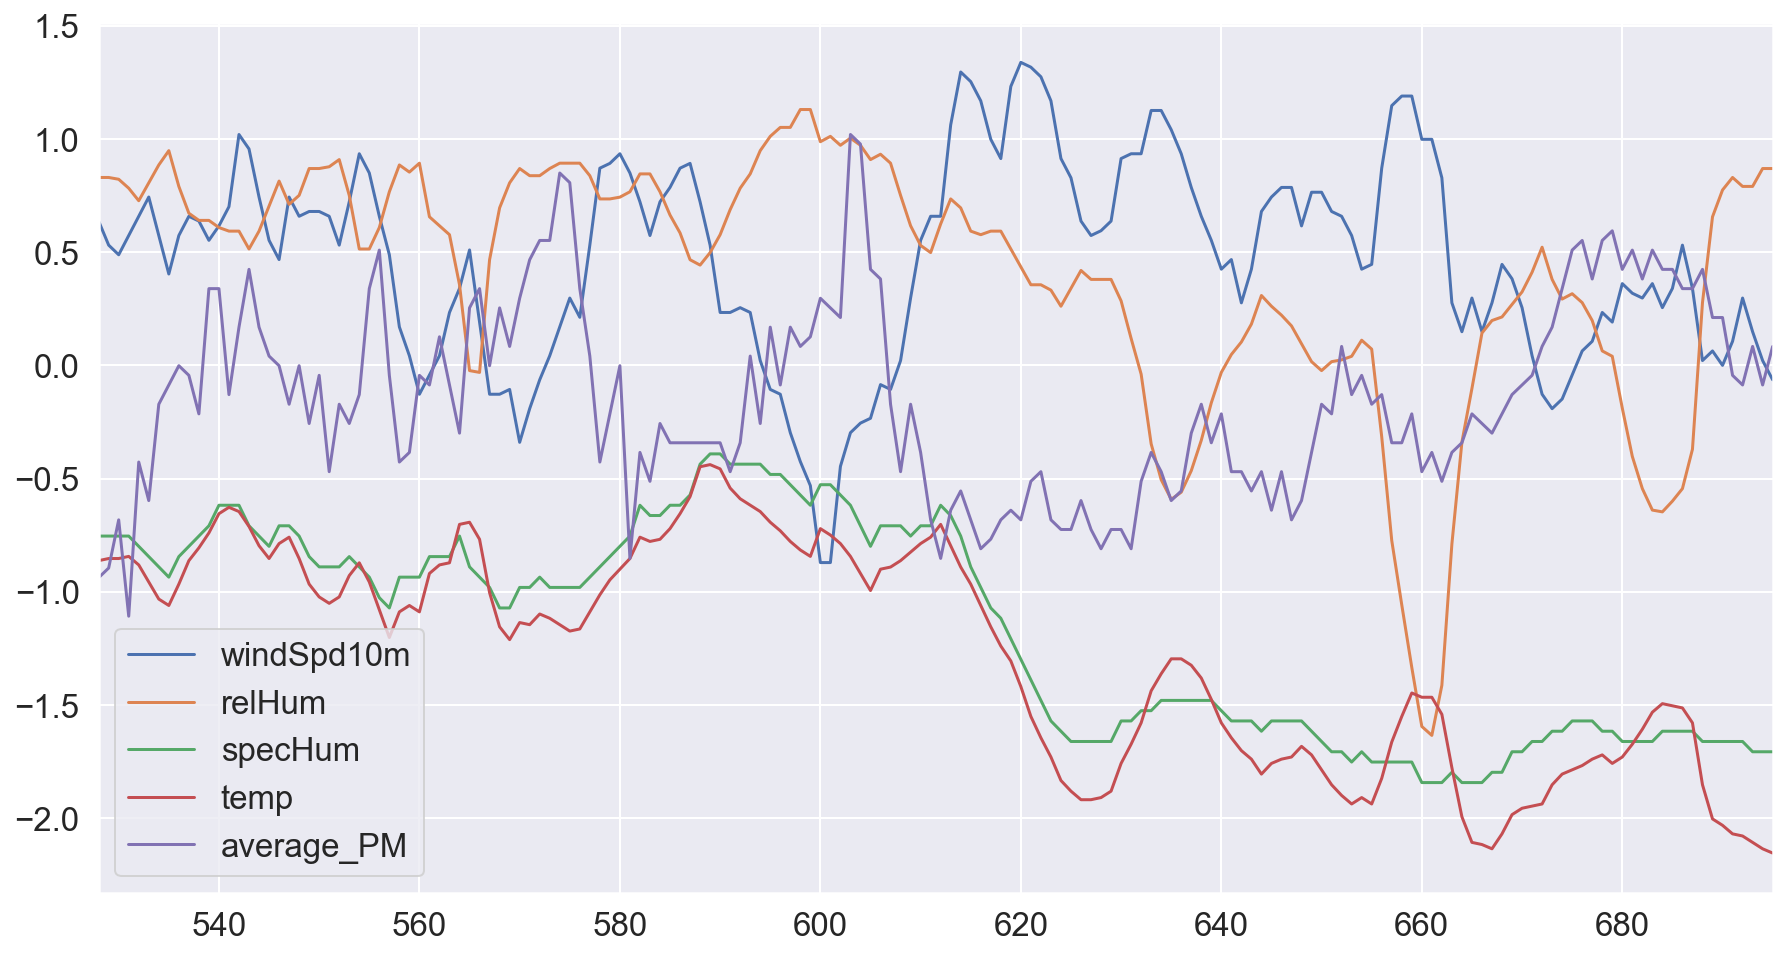

In [61]:
day_no = 1
week_no = 3
df_std.iloc[24*(day_no+7*week_no):24*(day_no+7*(week_no+1)),:].plot(figsize=(15,8))
plt.show()

specific humidity changes with temperature, windspeed and PM changes inversely with one another.

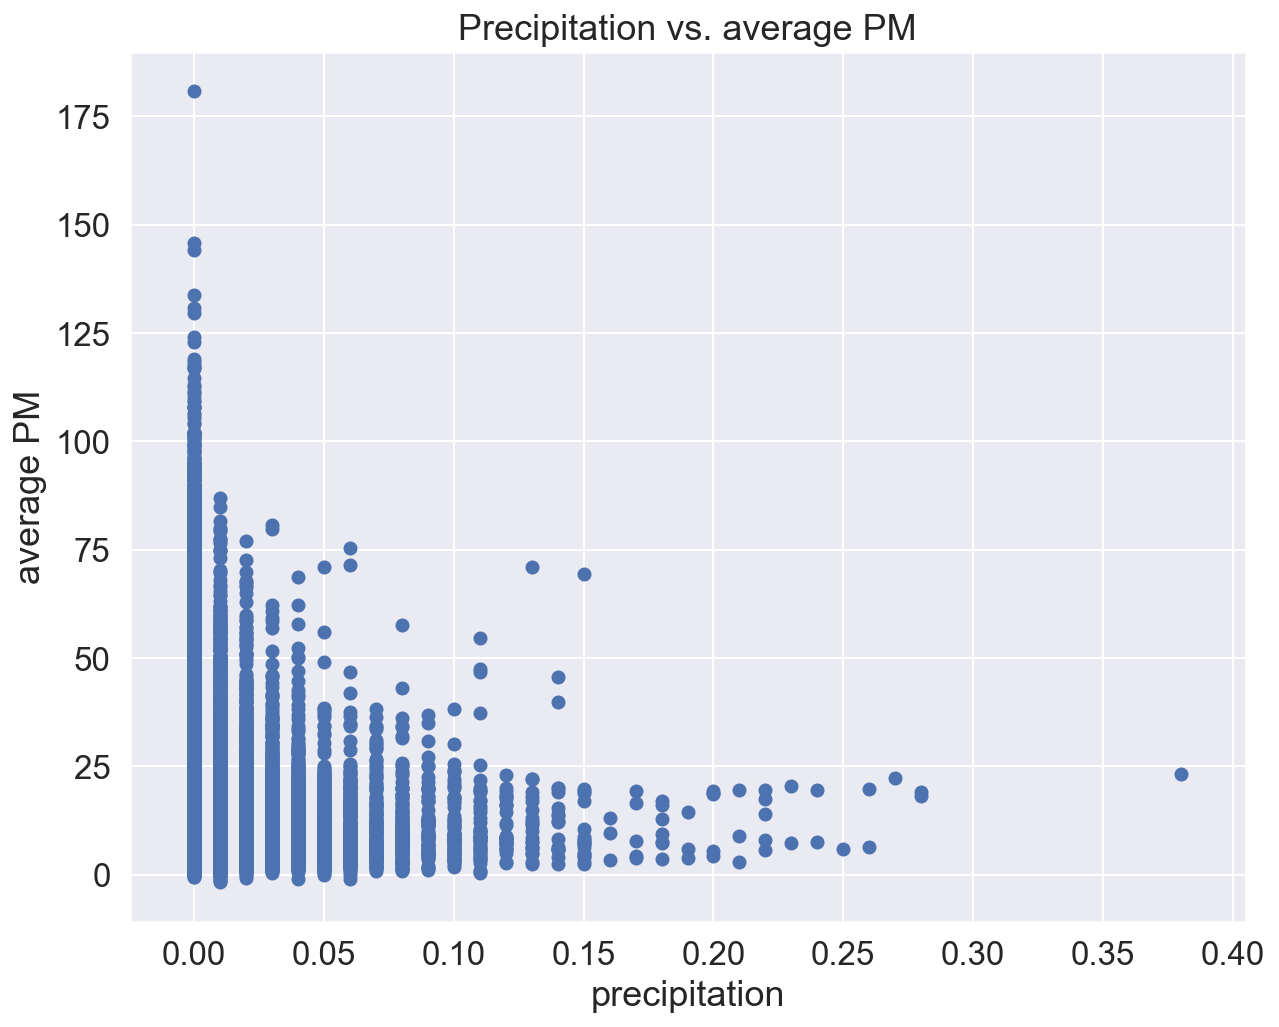

In [607]:
#does heavy rainfall give small PM?
plt.figure(figsize=(10,8))
plt.title('Precipitation vs. average PM')
plt.scatter(data.precip,data.average_PM)
plt.xlabel('precipitation')
plt.ylabel('average PM')
plt.show()

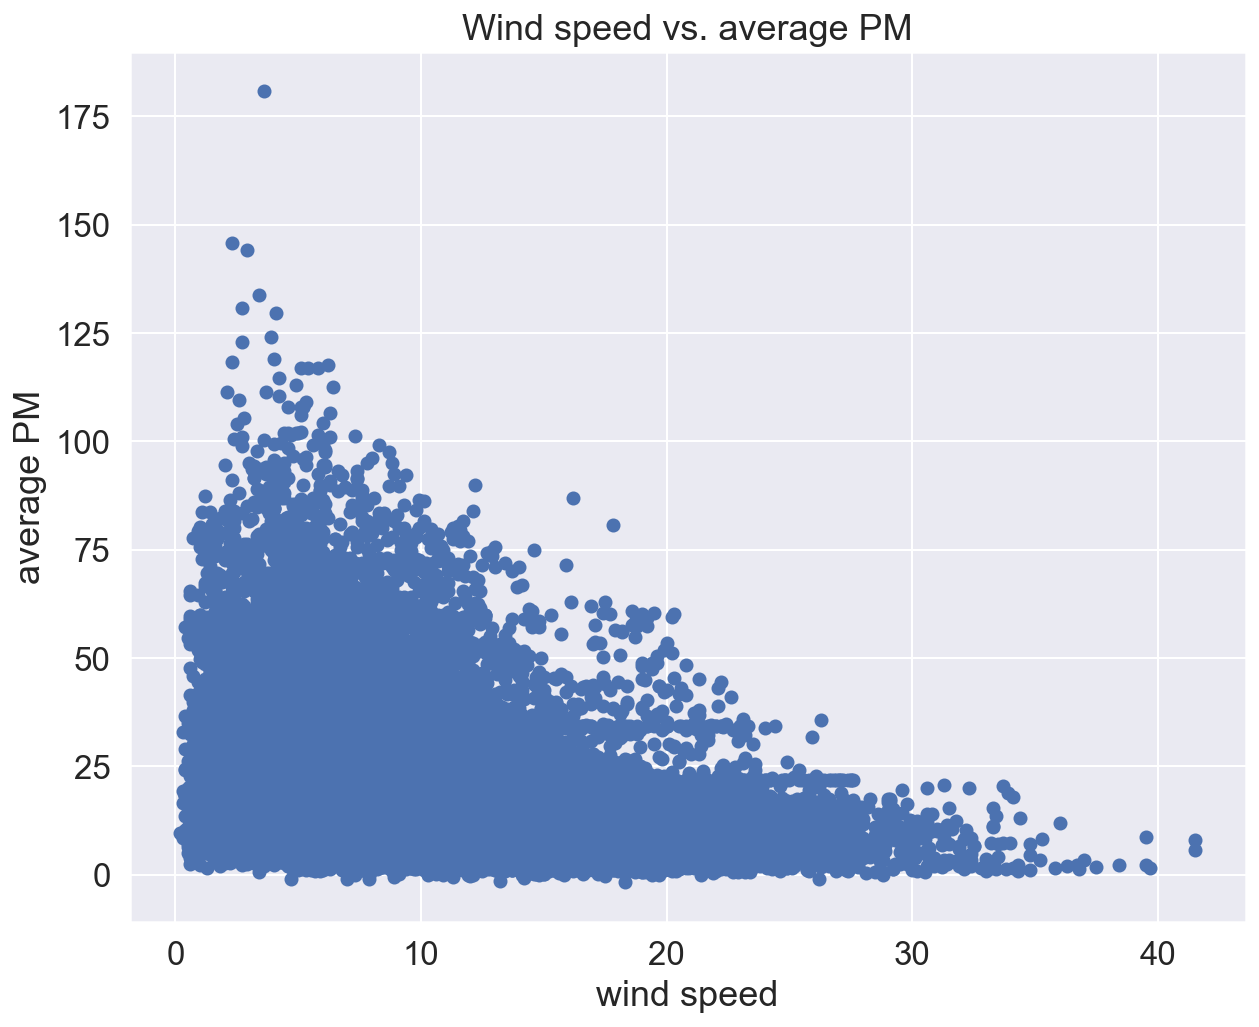

In [606]:
plt.figure(figsize=(10,8))
plt.scatter(data.windSpd10m,data.average_PM)
plt.title('Wind speed vs. average PM')
plt.xlabel('wind speed')
plt.ylabel('average PM')
plt.show()

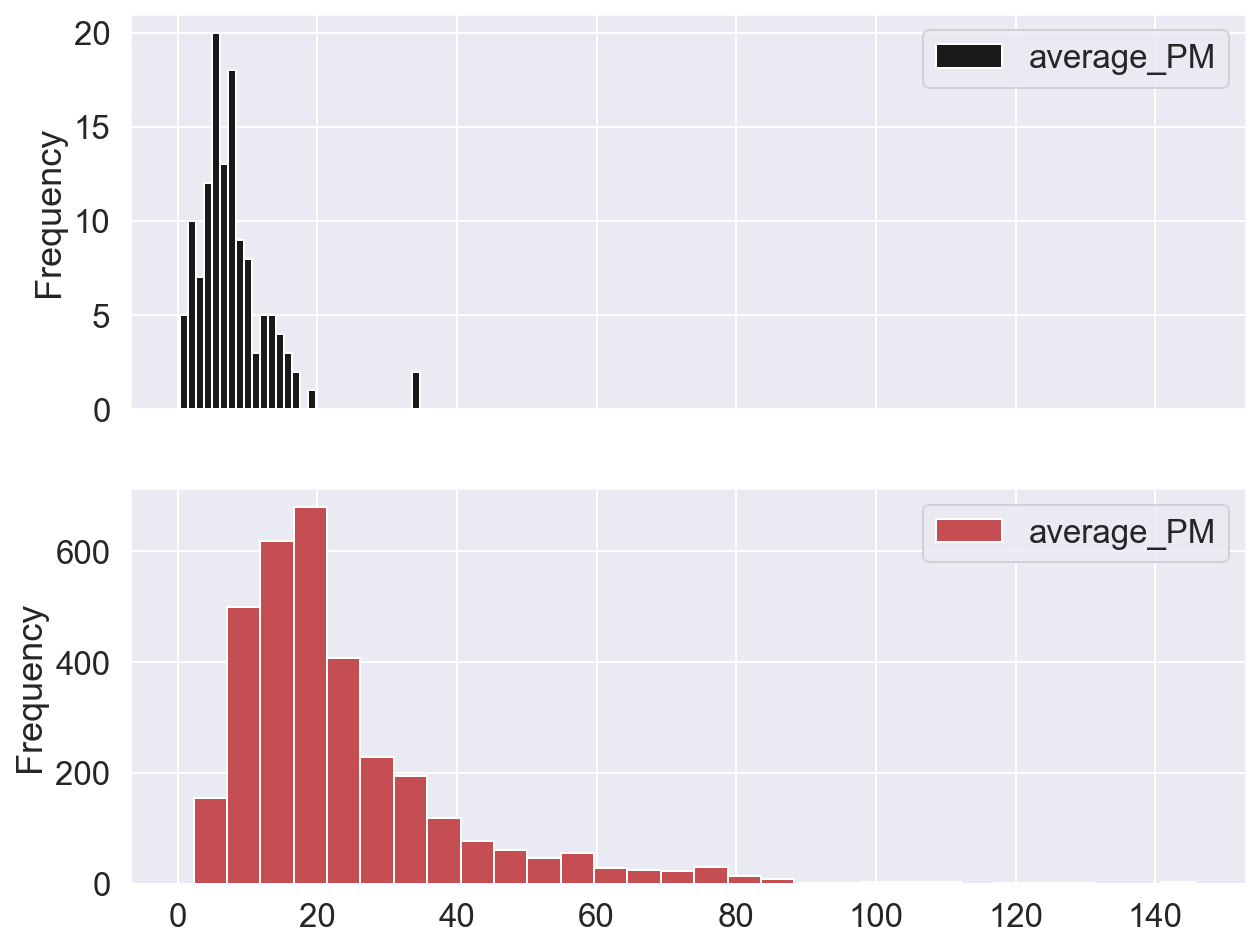

In [523]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0] = data[(data.windSpd10m > 20) & (data.precip > .05)][['average_PM']].plot(ax=ax[0],kind='hist',color='k',bins=30,figsize=(10,8),label='rainy+windy')
ax[1] = data[(data.windSpd10m < 3) & (data.precip < .001)][['average_PM']].plot(ax=ax[1],kind='hist',color='r',bins=30,figsize=(10,8),label='dry no wind')
ax[0].legend()
ax[1].legend()
plt.show()

In [615]:
wind_dirs = data.groupby('wind_dir',sort=False)[['radSolar','temp','precip','windSpd10m','average_PM','specHum']].mean()
wind_std = pd.DataFrame(scaler.fit_transform(wind_dirs),columns=wind_dirs.columns)

In [616]:
wind_dirs.index

Index(['none', 'north-west', 'north', 'south-west', 'south-east', 'south',
       'west', 'east', 'north-east'],
      dtype='object', name='wind_dir')

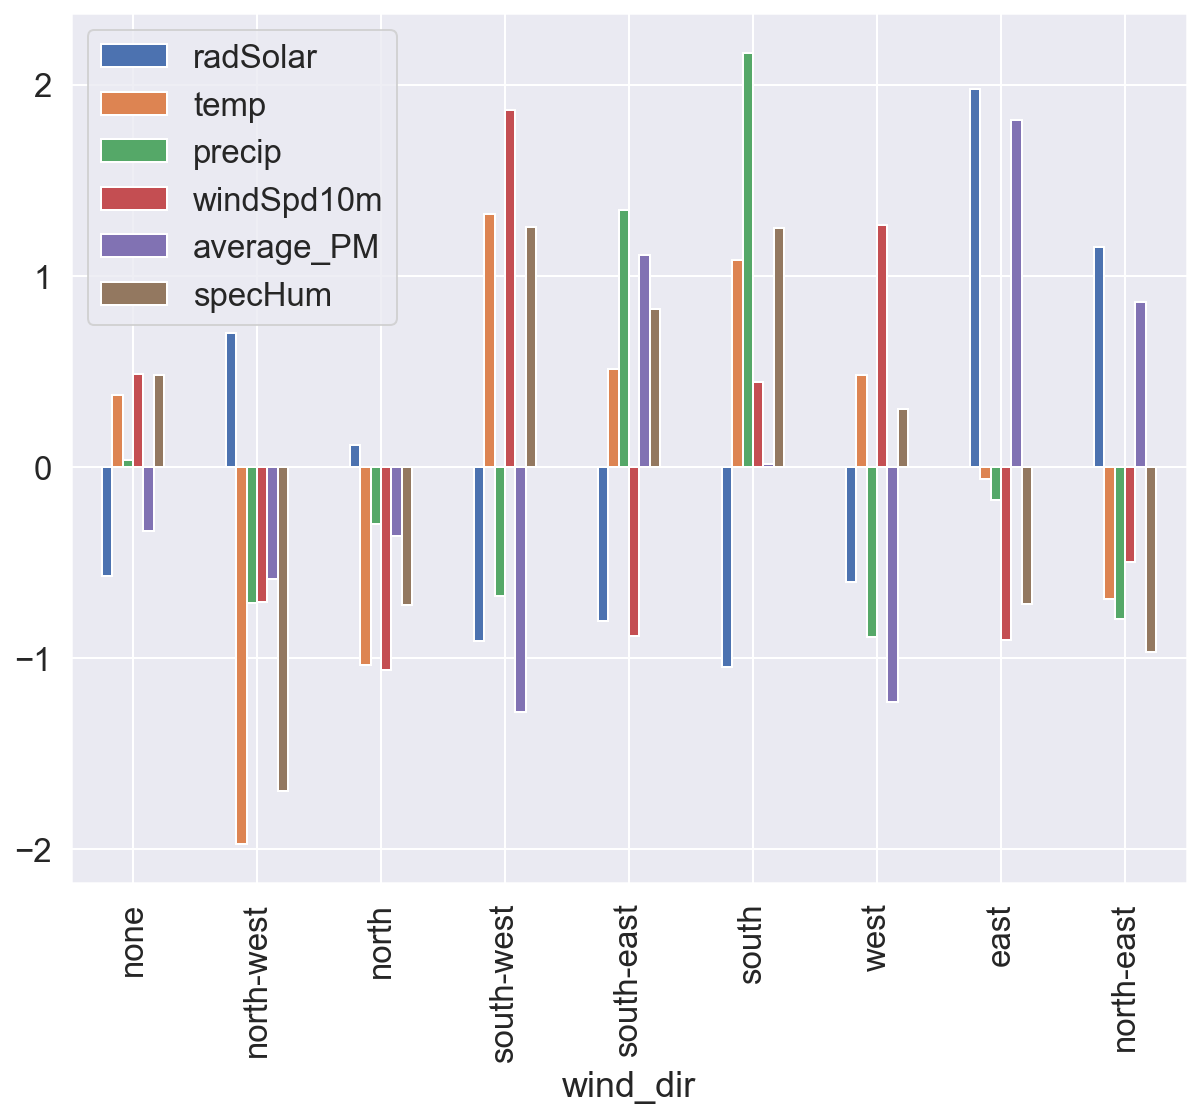

In [617]:
wind_std.set_index(wind_dirs.index).plot(kind='bar',figsize=(10,8));

easterly winds contributed to higher recorded PM, westerly winds least.

In [62]:
## standardise the data and let's get all variables into a plot
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_sub = data.set_index('date_time')[['mslPres','cldCvr','average_PM']]

df_std = pd.DataFrame(scaler.fit_transform(data_sub),columns = data_sub.columns)

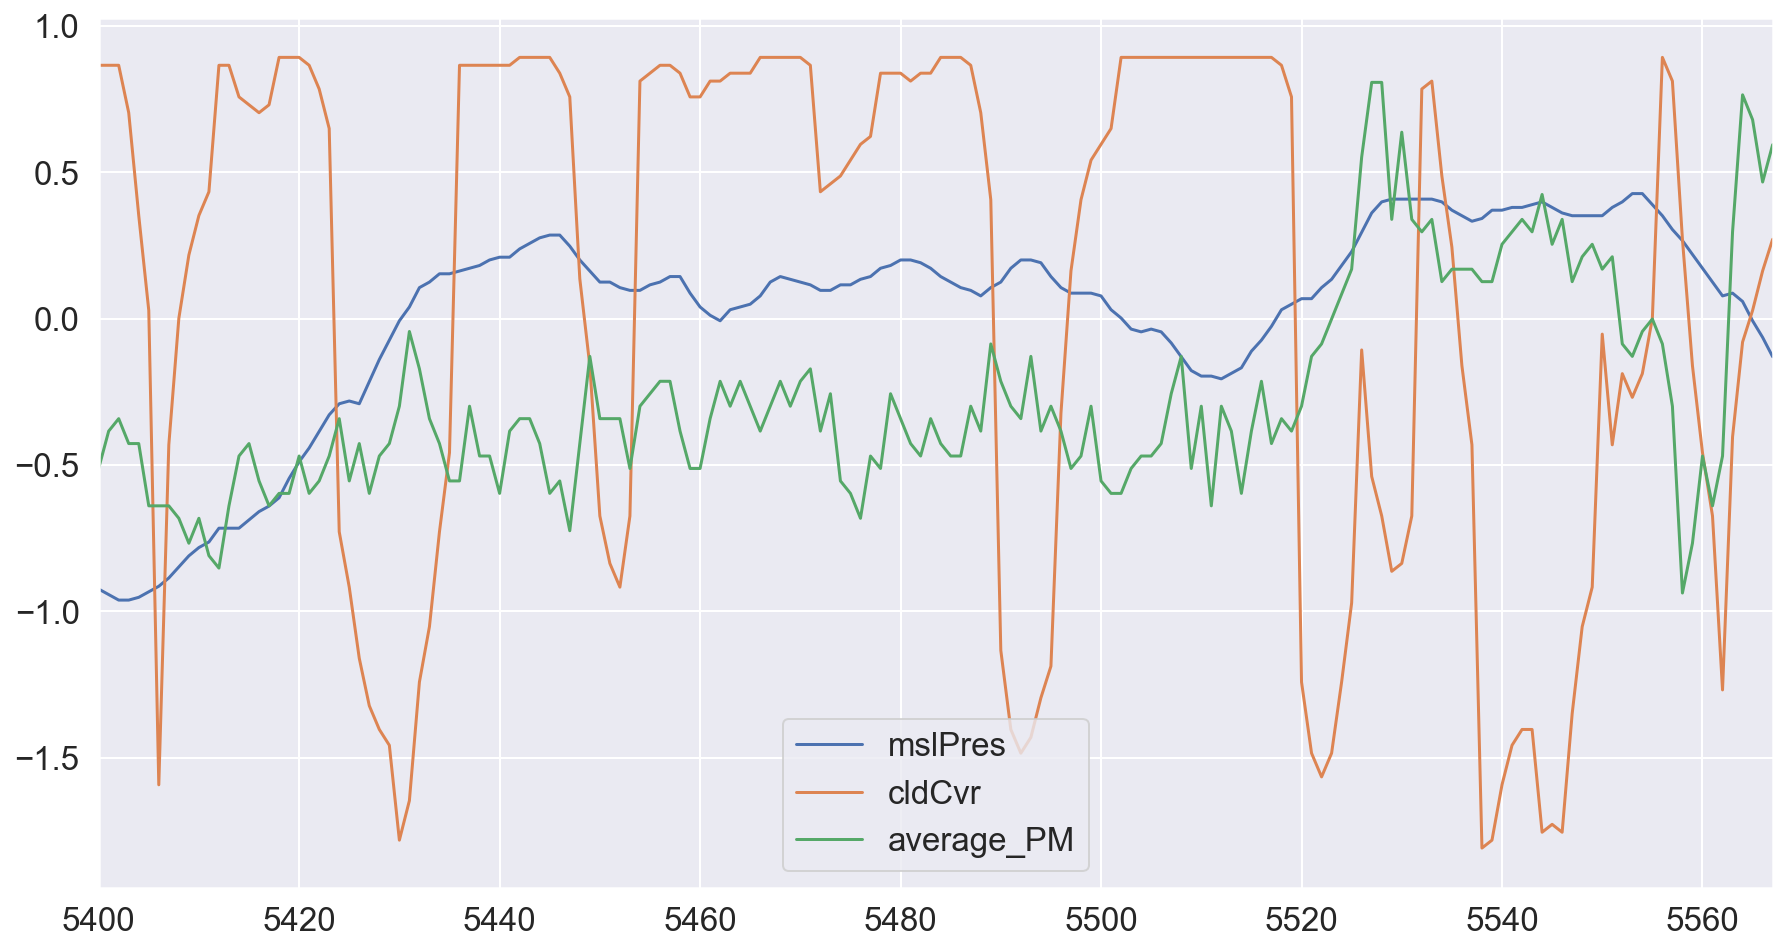

In [70]:
day_no = 1
week_no = 32
df_std.iloc[24*(day_no+7*week_no):24*(day_no+7*(week_no+1)),:].plot(figsize=(15,8))
plt.show()

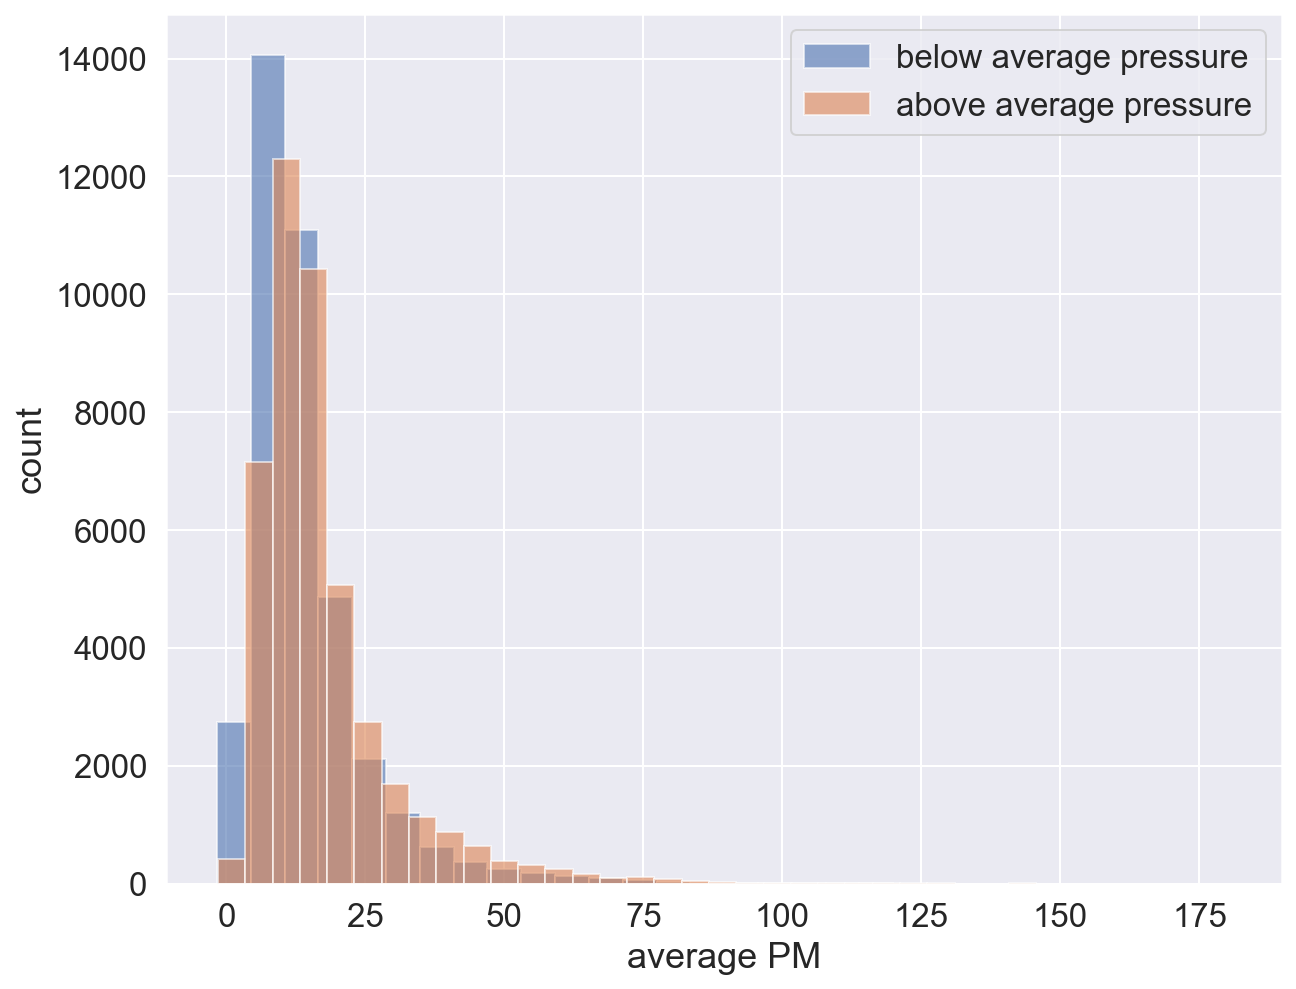

In [5]:
high_pres = data[data.mslPres > data.mslPres.mean()].set_index('date_time')
low_pres = data[data.mslPres < data.mslPres.mean()].set_index('date_time')
plt.figure(figsize=(10,8))
low_pres.average_PM.hist(bins=30,label='below average pressure',alpha=.6)
high_pres.average_PM.hist(bins=30,label='above average pressure',alpha=.6)



plt.xlabel('average PM')
plt.ylabel('count')
plt.legend()
plt.show()

higher counts of low PM concentration in a low pressure setting, and more frequently higher recorded PM when pressure is above average.

In [136]:
stats = df_sorted.groupby('year')[['temp']].agg(['mean','count','std'])
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo

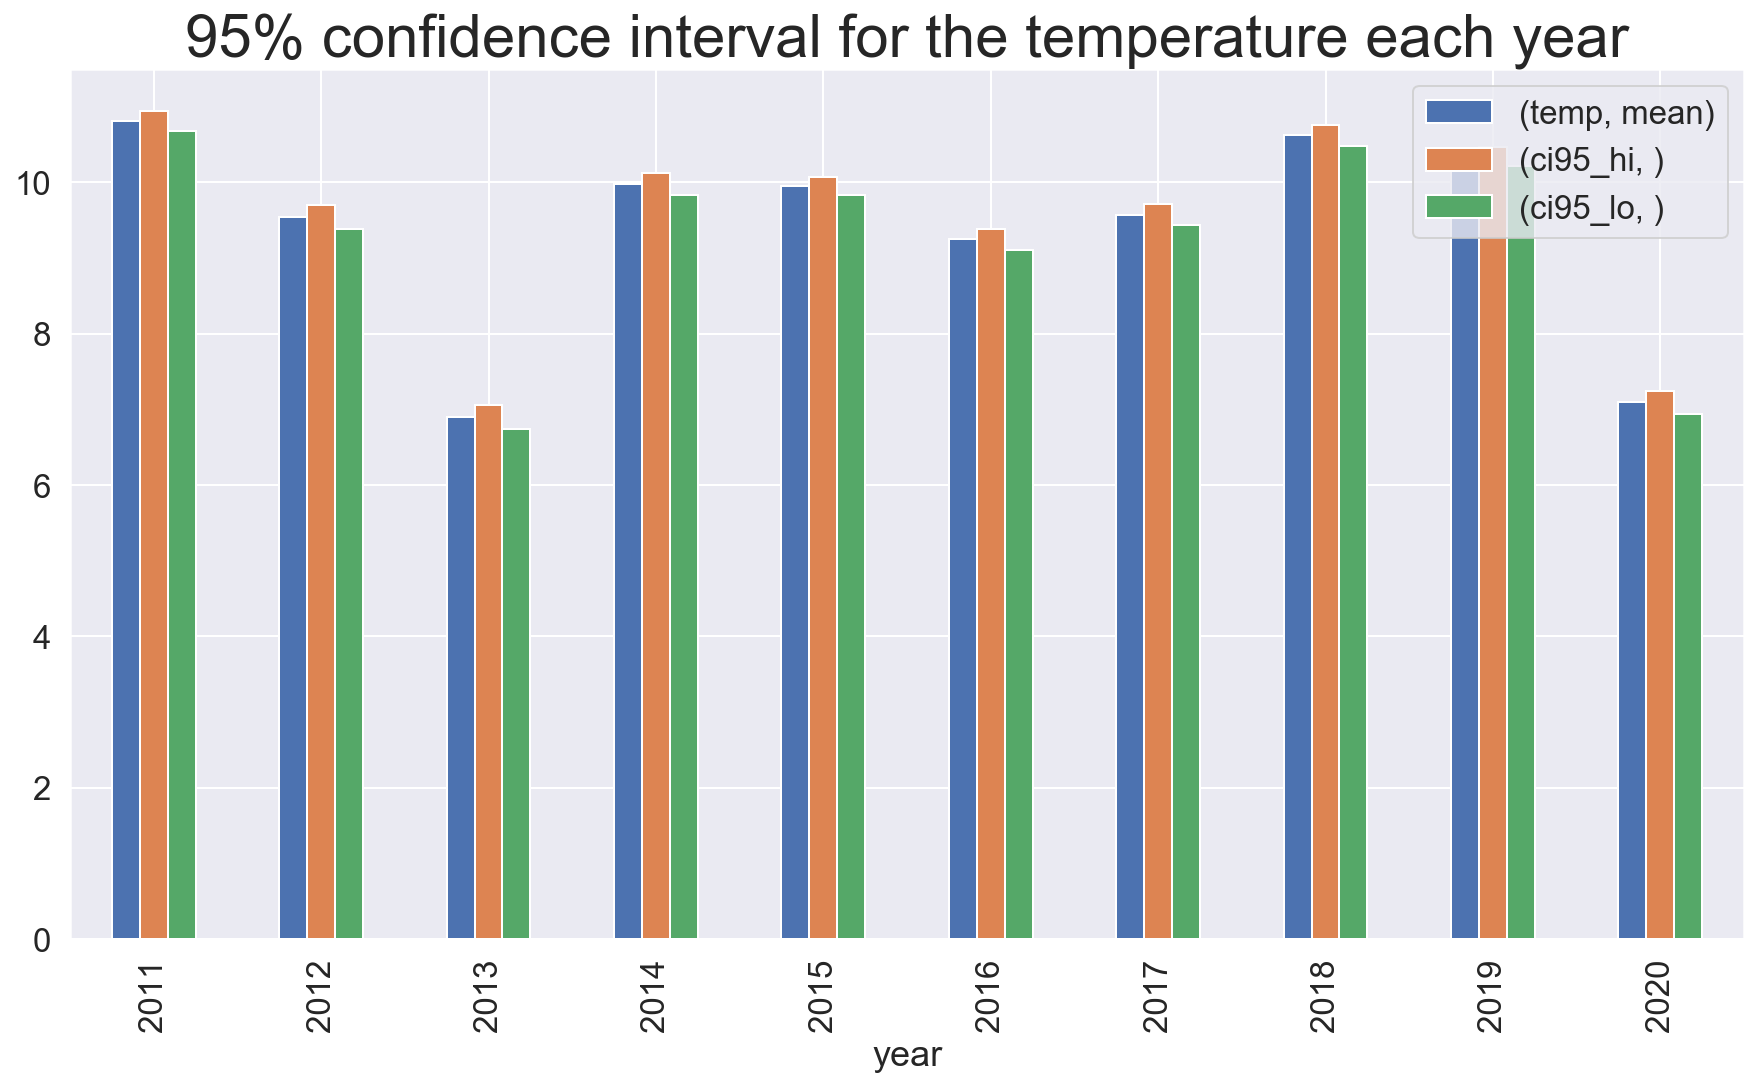

In [137]:
stats.iloc[:, [0,-2,-1]].plot(kind='bar',figsize=(15,8),stacked=False)
plt.title('95% confidence interval for the temperature each year',fontdict={'fontsize':30})
plt.ylabel=('Degrees C')

plt.legend()
plt.show()

No abnormalities in the temperature. 